In [3]:
from roboticstoolbox import *
from spatialmath import *
from math import pi
import numpy as np

%matplotlib widget

In [4]:
DFbot = DHRobot(
    [
        RevoluteDH(d=0.04145,alpha=np.pi/2,qlim=np.array([-np.pi,np.pi])),
        RevoluteDH(a=-0.08285,qlim=np.array([-np.pi,np.pi])),
        RevoluteDH(a=-0.08285,qlim=np.array([-np.pi,np.pi])),
        RevoluteDH(alpha=-np.pi/2,qlim=np.array([-np.pi,np.pi])),
        RevoluteDH(d=0.11,qlim=np.array([-np.pi,3/2*np.pi]))
    ],
    name = "DFbot",
)
print(DFbot)

DHRobot: DFbot, 5 joints (RRRRR), dynamics, standard DH parameters
┌─────┬─────────┬──────────┬────────┬─────────┬────────┐
│ θⱼ  │   dⱼ    │    aⱼ    │   ⍺ⱼ   │   q⁻    │   q⁺   │
├─────┼─────────┼──────────┼────────┼─────────┼────────┤
│  q1 │ 0.04145 │        0 │  90.0° │ -180.0° │ 180.0° │
│  q2 │       0 │ -0.08285 │   0.0° │ -180.0° │ 180.0° │
│  q3 │       0 │ -0.08285 │   0.0° │ -180.0° │ 180.0° │
│  q4 │       0 │        0 │ -90.0° │ -180.0° │ 180.0° │
│  q5 │    0.11 │        0 │   0.0° │ -180.0° │ 270.0° │
└─────┴─────────┴──────────┴────────┴─────────┴────────┘

┌──┬──┐
└──┴──┘



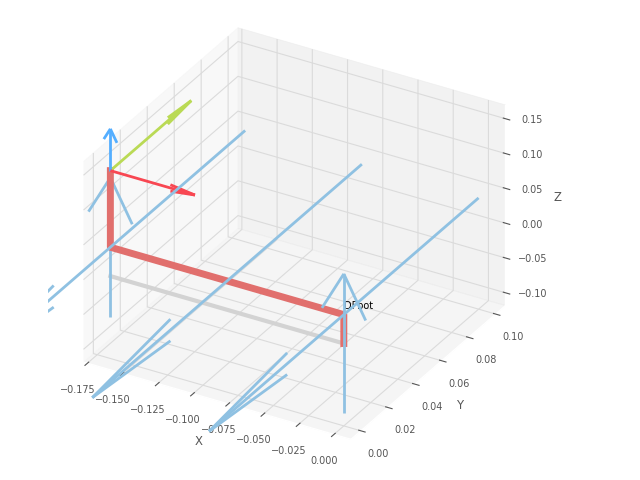

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'DFbot')

In [5]:
DFbot.plot([0,0,0,0,0])

In [40]:
DFbot.plot([0,-np.pi/6,0,np.pi/6,0])

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'DFbot')

In [12]:
#Forward kinematics
T = DFbot.fkine([0,-np.pi/6,0,np.pi/6,0])
T

   1         0         0        -0.1435    
   0         1         0         0         
   0         0         1         0.2343    
   0         0         0         1         


In [ ]:
# Inverse kinematics

In [27]:
state0=[0,0,0,0,0]
T0=DFbot.fkine(state0)
state1=[0,-np.pi/6,0,np.pi/6,0]
T1=DFbot.fkine(state1)
T1

   1         0         0        -0.1435    
   0         1         0         0         
   0         0         1         0.2343    
   0         0         0         1         


In [32]:
#Levemberg-Marquadt method
sol = DFbot.ikine_LM(T1,q0=state0,ilimit=100,slimit=100,joint_limits=True)
print(sol)
print(DFbot.fkine(sol.q))

IKSolution: q=[0, -0.5235, -0.0002459, 0.5237, 0], success=True, iterations=3, searches=1, residual=1.03e-07
   1         0         5.191e-08 -0.1435    
   0         1         0         0         
  -5.191e-08  0         1         0.2343    
   0         0         0         1         



In [37]:
#Gauss-Newton method
sol = DFbot.ikine_GN(T1,q0=state0,ilimit=1000,slimit=1000,joint_limits=True)
sol

IKSolution(q=array([-1.35933448,  2.90180579, -2.39354243, -0.33824489, -0.78281063]), success=False, iterations=100000, searches=100000, residual=0.0, reason='iteration and search limit reached, 100000 numpy.LinAlgError encountered')

In [39]:
#Newton-Raphson
sol = DFbot.ikine_NR(T1,q0=state0,ilimit=1000,slimit=1000,joint_limits=True)
sol

IKSolution(q=array([ 0.48170456, -1.91131201,  1.62461314,  2.17973074,  4.67906691]), success=False, iterations=1000, searches=1000, residual=0.0, reason='iteration and search limit reached, 1000 numpy.LinAlgError encountered')